# 线性回归
线性回归输出是一个连续值，因此适用于回归问题。回归问题在实际中很常见，如预测房屋价格、气温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是一个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适用于分类问题。

由于线性回归和softmax回归都是单层神经网络，它们涉及的概念和技术同样适用于大多数的深度学习模型。我们首先以线性回归为例，介绍大多数深度学习模型的基本要素和表示方法。

我们以一个简单的房屋价格预测作为例子来解释线性回归的基本要素。这个应用的目标是预测一栋房子的售出价格（元）。我们知道这个价格取决于很多因素，如房屋状况、地段、市场行情等。为了简单起见，这里我们假设价格只取决于房屋状况的两个因素，即面积（平方米）和房龄（年）。接下来我们希望探索价格与这两个因素的具体关系。

## 模型定义

设房屋的面积为 $x_1$，房龄为 $x_2$，售出价格为 $y$。我们需要建立基于输入 $x_1$ 和 $x_2$ 来计算输出 $y$ 的表达式，也就是模型（model）。顾名思义，线性回归假设输出与各个输入之间是线性关系：
$$
\hat{y} = x_1 w_1 + x_2 w_2 + b
$$
其中 $w_1$ 和 $w_2$ 是权重（weight），$b$ 是偏差（bias），且均为标量。它们是线性回归模型的参数（parameter）。模型输出 $\hat{y}$ 是线性回归对真实价格 $y$ 的预测或估计。我们通常允许它们之间有一定误差。

# 模型训练
接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练（model training）。下面我们介绍模型训练所涉及的3个要素。

## 1.训练数据
我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。特征用来表征样本的特点。

假设我们采集的样本数为 $n$，索引为 $i$ 的样本的特征为 $x_1^{(i)}$ 和 $x_2^{(i)}$，标签为 $y^{(i)}$。对于索引为 $i$ 的房屋，线性回归模型的房屋价格预测表达式为
$$
\hat{y}^{(i)} = x_1^{(i)} w_1 + x_2^{(i)} w_2 + b
$$

## 2.损失函数
在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为

$$\ell^{(i)}(w_1, w_2, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

其中常数 $\frac 1 2$ 使对平方项求导后的常数系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为0。给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习里，将衡量误差的函数称为损失函数（loss function）。这里使用的平方误差函数也称为平方损失（square loss）。

通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，即

$$
\ell(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \ell^{(i)}(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2
$$

在模型训练中，我们希望找出一组模型参数，记为 $w_1^*, w_2^*, b^*$，来使训练样本平均损失最小：

$$
w_1^*, w_2^*, b^* = \underset{w_1, w_2, b}{\arg\min} \ell(w_1, w_2, b)
$$


## 3. 优化算法

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型的过程中，模型的每个参数将作如下迭代：

$$
\begin{aligned}
w_1 &\leftarrow w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} = w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
w_2 &\leftarrow w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} = w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
b &\leftarrow b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b} = b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right).
\end{aligned}
$$

在上式中，$|\mathcal{B}|$ 代表每个小批量中的样本个数（批量大小，batch size），$\eta$ 称作学习率（learning rate）并取正数。需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出的，因此叫作超参数（hyperparameter）。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。本书对此类情况不做讨论。

# 模型预测
模型训练完成后，我们将模型参数 $w_1, w_2, b$ 在优化算法停止时的值分别记作 $\hat{w}_1, \hat{w}_2, \hat{b}$。注意，这里我们得到的并不一定是最小化损失函数的最优解 $w_1^*, w_2^*, b^*$，而是对最优解的一个近似。然后，我们就可以使用学出的线性回归模型 $x_1 \hat{w}_1 + x_2 \hat{w}_2 + \hat{b}$ 来估算训练数据集以外任意一栋面积（平方米）为$x_1$、房龄（年）为$x_2$的房屋的价格了。这里的估算也叫作模型预测、模型推断或模型测试。

# 线性回归的表示方法

我们已经阐述了线性回归的模型表达式、训练和预测。下面我们解释线性回归与神经网络的联系，以及线性回归的矢量计算表达式。

## 1.神经网络图

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，图3.1使用神经网络图表示本节中介绍的线性回归模型。神经网络图隐去了模型参数权重和偏差。

<div align=center>
<img width="250" src="./img/chapter03/3.1_linreg.svg"/>
</div>
<div align=center>图3.1 线性回归是一个单层神经网络</div>

在图3.1所示的神经网络中，输入分别为 $x_1$ 和 $x_2$，因此输入层的输入个数为2。输入个数也叫特征数或特征向量维度。图3.1中网络的输出为 $o$，输出层的输出个数为1。需要注意的是，我们直接将图3.1中神经网络的输出 $o$ 作为线性回归的输出，即 $\hat{y} = o$。由于输入层并不涉及计算，按照惯例，图3.1所示的神经网络的层数为1。所以，线性回归是一个单层神经网络。输出层中负责计算 $o$ 的单元又叫神经元。在线性回归中，$o$ 的计算依赖于 $x_1$ 和 $x_2$。也就是说，输出层中的神经元和输入层中各个输入完全连接。因此，这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）。


## 2.矢量计算表达式

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，让我们先考虑对两个向量相加的两种方法。a

下面先定义两个1000维的向量。

In [1]:
import torch
from time import time
a = torch.ones(1000)
b = torch.ones(1000)

向量相加的一种方法是，将这两个向量按元素逐一做标量加法。

In [2]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.23540592193603516


向量相加的另一种方法是，将这两个向量直接做矢量加法


In [3]:
start = time()
d = a + b
print(time() - start)

0.0009996891021728516


结果很明显，后者比前者更省时。因此，我们应该尽可能采用矢量计算，以提升计算效率。

让我们再次回到本节的房价预测问题。如果我们对训练数据集里的3个房屋样本（索引分别为1、2和3）逐一预测价格，将得到
$$
\begin{aligned}
\hat{y}^{(1)} &= x_1^{(1)} w_1 + x_2^{(1)} w_2 + b,\\
\hat{y}^{(2)} &= x_1^{(2)} w_1 + x_2^{(2)} w_2 + b,\\
\hat{y}^{(3)} &= x_1^{(3)} w_1 + x_2^{(3)} w_2 + b.
\end{aligned}
$$

现在，我们将上面3个等式转化成矢量计算。设

$$
\boldsymbol{\hat{y}} =
\begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \hat{y}^{(3)}
\end{bmatrix},\quad
\boldsymbol{X} =
\begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} \\
    x_1^{(2)} & x_2^{(2)} \\
    x_1^{(3)} & x_2^{(3)}
\end{bmatrix},\quad
\boldsymbol{w} =
\begin{bmatrix}
    w_1 \\
    w_2
\end{bmatrix}
$$

对3个房屋样本预测价格的矢量计算表达式为$\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b,$ 其中的加法运算使用了广播机制。例如：

In [4]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


广义上讲，当数据样本数为 $n$，特征数为 $d$ 时，线性回归的矢量计算表达式为
$$
\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b
$$
其中模型输出 $\boldsymbol{\hat{y}} \in \mathbb{R}^{n \times 1}$ 批量数据样本特征 $\boldsymbol{X} \in \mathbb{R}^{n \times d}$，权重 $\boldsymbol{w} \in \mathbb{R}^{d \times 1}$， 偏差 $b \in \mathbb{R}$。相应地，批量数据样本标签 $\boldsymbol{y} \in \mathbb{R}^{n \times 1}$。设模型参数 $\boldsymbol{\theta} = [w_1, w_2, b]^\top$，我们可以重写损失函数为
$$
\ell(\boldsymbol{\theta})=\frac{1}{2n}(\boldsymbol{\hat{y}}-\boldsymbol{y})^\top(\boldsymbol{\hat{y}}-\boldsymbol{y})
$$

小批量随机梯度下降的迭代步骤将相应地改写为
$$
\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}   \nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta}),
$$

其中梯度是损失有关3个为标量的模型参数的偏导数组成的向量：
$$
\nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta})=
\begin{bmatrix}
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} \\
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} \\
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b}
\end{bmatrix} =
\begin{bmatrix}
    x_1^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\
    x_2^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\
    x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}
\end{bmatrix}=
\begin{bmatrix}
    x_1^{(i)} \\
    x_2^{(i)} \\
    1
\end{bmatrix}
(\hat{y}^{(i)} - y^{(i)})
$$


# 线性回归从零开始实现
在了解了线性回归的背景知识之后，现在我们可以动手实现它了。尽管强大的深度学习框架可以减少大量重复性工作，但若过于依赖它提供的便利，会导致我们很难深入理解深度学习是如何工作的。因此，本节将介绍如何只利用`Tensor`和`autograd`来实现一个线性回归的训练。

首先，导入本节中实验所需的包或模块，其中的matplotlib包可用于作图，且设置成嵌入显示。

In [5]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

## 生成数据集
我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征 $\boldsymbol{X} \in \mathbb{R}^{1000 \times 2}$，我们使用线性回归模型真实权重 $\boldsymbol{w} = [2, -3.4]^\top$ 和偏差 $b = 4.2$，以及一个随机噪声项 $\epsilon$ 来生成标签
$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + b + \epsilon
$$

其中噪声项 $\epsilon$ 服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中无意义的干扰。下面，让我们生成数据集。

In [6]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

注意，`features`的每一行是一个长度为2的向量，而`labels`的每一行是一个长度为1的向量（标量）。

In [7]:
print(features[0], labels[0])

tensor([-2.3152, -0.5496]) tensor(1.4226)


通过生成第二个特征`features[:, 1]`和标签 `labels` 的散点图，可以更直观地观察两者间的线性关系。

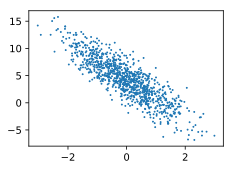

In [8]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

我们将上面的`plt`作图函数以及`use_svg_display`函数和`set_figsize`函数定义在`d2lzh_pytorch`包里。以后在作图时，我们将直接调用`d2lzh_pytorch.plt`。由于`plt`在`d2lzh_pytorch`包中是一个全局变量，我们在作图前只需要调用`d2lzh_pytorch.set_figsize()`即可打印矢量图并设置图的尺寸。

## 读取数据
在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回`batch_size`（批量大小）个随机样本的特征和标签。

In [9]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

让我们读取第一个小批量数据样本并打印。每个批量的特征形状为(10, 2)，分别对应批量大小和输入个数；标签形状为批量大小。

In [10]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.9554,  1.3320],
        [-1.1291,  1.4139],
        [ 0.0175, -0.2976],
        [ 1.7408,  0.0450],
        [ 1.1905, -0.7213],
        [-1.2516, -0.7926],
        [-0.9427, -0.8127],
        [ 0.8527,  0.1163],
        [ 1.3311,  1.9706],
        [ 0.0270,  1.0799]]) tensor([ 1.5806, -2.8694,  5.2346,  7.5371,  9.0410,  4.4033,  5.0651,  5.5129,
         0.1627,  0.5763])


## 初始化模型参数
我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。

In [11]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

之后的模型训练中，需要对这些参数求梯度来迭代参数的值，因此我们要让它们的`requires_grad=True`。

In [12]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

## 定义模型
下面是线性回归的矢量计算表达式的实现。我们使用`mm`函数做矩阵乘法。

In [13]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

## 定义损失函数
我们使用上一节描述的平方损失来定义线性回归的损失函数。在实现中，我们需要把真实值`y`变形成预测值`y_hat`的形状。以下函数返回的结果也将和`y_hat`的形状相同。

In [14]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 定义优化算法
以下的`sgd`函数实现了上一节中介绍的小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小来得到平均值。

In [15]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

## 训练模型
在训练中，我们将多次迭代模型参数。在每次迭代中，我们根据当前读取的小批量数据样本（特征`X`和标签`y`），通过调用反向函数`backward`计算小批量随机梯度，并调用优化算法`sgd`迭代模型参数。由于我们之前设批量大小`batch_size`为10，每个小批量的损失`l`的形状为(10, 1)。回忆一下自动求梯度一节。由于变量`l`并不是一个标量，所以我们可以调用`.sum()`将其求和得到一个标量，再运行`l.backward()`得到该变量有关模型参数的梯度。注意在每次更新完参数后不要忘了将参数的梯度清零。

在一个迭代周期（epoch）中，我们将完整遍历一遍`data_iter`函数，并对训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。这里的迭代周期个数`num_epochs`和学习率`lr`都是超参数，分别设3和0.03。在实践中，大多超参数都需要通过反复试错来不断调节。虽然迭代周期数设得越大模型可能越有效，但是训练时间可能过长。而有关学习率对模型的影响，我们会在后面“优化算法”一章中详细介绍。

In [16]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.039022
epoch 2, loss 0.000145
epoch 3, loss 0.000048


训练完成后，我们可以比较学到的参数和用来生成训练集的真实参数。它们应该很接近。

In [17]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9999],
        [-3.3997]], requires_grad=True)
4.2 
 tensor([4.1988], requires_grad=True)


# 简洁实现
随着深度学习框架的发展，开发深度学习应用变得越来越便利。实践中，我们通常可以用比上一节更简洁的代码来实现同样的模型。在本节中，我们将介绍如何使用PyTorch更方便地实现线性回归的训练

## 生成数据集
我们生成与上一节中相同的数据集。其中`features`是训练数据特征，`labels`是标签。

In [18]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

## 读取数据
PyTorch提供了`data`包来读取数据。由于`data`常用作变量名，我们将导入的`data`模块用`Data`代替。在每一次迭代中，我们将随机读取包含10个数据样本的小批量。

In [19]:
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

这里`data_iter`的使用跟上一节中的一样。让我们读取并打印第一个小批量数据样本。

In [21]:
for X, y in data_iter:
    print(X, y)
    break
    

tensor([[-0.1443,  0.1290],
        [ 1.3481,  1.5861],
        [-1.0481,  0.6813],
        [-1.6140,  1.9577],
        [ 0.9689,  0.6683],
        [ 0.1656, -0.4667],
        [ 0.7001,  0.4705],
        [ 0.0225, -0.6391],
        [-0.1123, -0.8052],
        [ 0.9475, -0.2171]]) tensor([ 3.4628,  1.5164, -0.2099, -5.6869,  3.8573,  6.1124,  4.0053,  6.4186,
         6.7102,  6.8387])


## 定义模型
在上一节从零开始的实现中，我们需要定义模型参数，并使用它们一步步描述模型是怎样计算的。当模型结构变得更复杂时，这些步骤将变得更繁琐。其实，PyTorch提供了大量预定义的层，这使我们只需关注使用哪些层来构造模型。下面将介绍如何使用PyTorch更简洁地定义线性回归。

首先，导入`torch.nn`模块。实际上，“nn”是neural networks（神经网络）的缩写。顾名思义，该模块定义了大量神经网络的层。之前我们已经用过了`autograd`，而`nn`就是利用`autograd`来定义模型。`nn`的核心数据结构是`Module`，它是一个抽象概念，既可以表示神经网络中的某个层（layer），也可以表示一个包含很多层的神经网络。在实际使用中，最常见的做法是继承`nn.Module`，撰写自己的网络/层。一个`nn.Module`实例应该包含一些层以及返回输出的前向传播（forward）方法。下面先来看看如何用`nn.Module`实现一个线性回归模型。

In [23]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


事实上我们还可以用`nn.Sequential`来更加方便地搭建网络，`Sequential`是一个有序的容器，网络层将按照在传入`Sequential`的顺序依次被添加到计算图中。

In [24]:
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


可以通过`net.parameters()`来查看模型所有的可学习参数，此函数将返回一个生成器。

In [25]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0926,  0.5212]], requires_grad=True)
Parameter containing:
tensor([0.6825], requires_grad=True)


回顾图3.1中线性回归在神经网络图中的表示。作为一个单层神经网络，线性回归输出层中的神经元和输入层中各个输入完全连接。因此，线性回归的输出层又叫全连接层。

> 注意：`torch.nn`仅支持输入一个batch的样本不支持单个样本输入，如果只有单个样本，可使用`input.unsqueeze(0)`来添加一维。

## 初始化模型参数
在使用`net`前，我们需要初始化模型参数，如线性回归模型中的权重和偏差。PyTorch在`init`模块中提供了多种参数初始化方法。这里的`init`是`initializer`的缩写形式。我们通过`init.normal_`将权重参数每个元素初始化为随机采样于均值为0、标准差为0.01的正态分布。偏差会初始化为零。

In [26]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)  # 也可以直接修改bias的data: net[0].bias.data.fill_(0)

Parameter containing:
tensor([0.], requires_grad=True)

注：如果这里的`net`是用3.3.3节一开始的代码自定义的，那么上面代码会报错，`net[0].weight`应改为`net.linear.weight`，`bias`亦然。因为`net[0]`这样根据下标访问子模块的写法只有当`net`是个`ModuleList`或者`Sequential`实例时才可以。

## 定义优化算法
同样，我们也无须自己实现小批量随机梯度下降算法。`torch.optim`模块提供了很多常用的优化算法比如SGD、Adam和RMSProp等。下面我们创建一个用于优化`net`所有参数的优化器实例，并指定学习率为0.03的小批量随机梯度下降（SGD）为优化算法。

In [27]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


我们还可以为不同子网络设置不同的学习率，这在finetune时经常用到。例：

In [36]:
# optimizer =optim.SGD([
#                 # 如果对某个参数不指定学习率，就使用最外层的默认学习率
#                 {'params': net[0].parameters()}, # lr=0.03
#                 {'params': net[1].parameters(), 'lr': 0.01}
#             ], lr=0.03)
optimizer = optim.SGD([{'params':net[0].parameters(),'lr':0.03}])

有时候我们不想让学习率固定成一个常数，那如何调整学习率呢？主要有两种做法。一种是修改`optimizer.param_groups`中对应的学习率，另一种是更简单也是较为推荐的做法——新建优化器，由于optimizer十分轻量级，构建开销很小，故而可以构建新的optimizer。但是后者对于使用动量的优化器（如Adam），会丢失动量等状态信息，可能会造成损失函数的收敛出现震荡等情况。

In [37]:
# 调整学习率
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1 # 学习率为之前的0.1倍

## 训练模型
在训练模型时，我们通过调用`optim`实例的`step`函数来迭代模型参数。按照小批量随机梯度下降的定义，我们在`step`函数中指明批量大小，从而对批量中样本梯度求平均。

In [40]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1)).sum()
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.324345
epoch 2, loss: 0.001067
epoch 3, loss: 0.000268


下面我们分别比较学到的模型参数和真实的模型参数。我们从`net`获得需要的层，并访问其权重（`weight`）和偏差（`bias`）。学到的参数和真实的参数很接近。

In [41]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 2.0001, -3.3999]], requires_grad=True)
4.2 Parameter containing:
tensor([4.2000], requires_grad=True)
